In [1]:
#Louvain = Hierarchical clustering algorithm
#!pip install python-louvain
import community
import matplotlib.pyplot as plt
import networkx as nx
import random
from networkx.drawing.nx_agraph import graphviz_layout
G = nx.read_edgelist('./facebook_combined.txt')

In [2]:
dendrogram = community.generate_dendrogram(G) #tree structure

In [6]:
for level in range(len(dendrogram)) :
    print("partition at level", level, "is", community.partition_at_level(dendrogram, level))
    print(set(community.partition_at_level(dendrogram, level).values()))

partition at level 0 is {'0': 16, '1': 16, '2': 22, '3': 16, '4': 36, '5': 16, '6': 6, '7': 16, '8': 47, '9': 16, '10': 16, '11': 16, '12': 16, '13': 16, '14': 22, '15': 16, '16': 16, '17': 22, '18': 16, '19': 22, '20': 22, '21': 16, '22': 16, '23': 16, '24': 24, '25': 16, '26': 16, '27': 16, '28': 22, '29': 16, '30': 16, '31': 16, '32': 22, '33': 33, '34': 27, '35': 53, '36': 62, '37': 16, '38': 16, '39': 16, '40': 16, '41': 22, '42': 33, '43': 16, '44': 22, '45': 16, '46': 53, '47': 16, '48': 16, '49': 49, '50': 16, '51': 16, '52': 31, '53': 24, '54': 16, '55': 16, '56': 16, '57': 24, '58': 77, '59': 16, '60': 16, '61': 16, '62': 16, '63': 16, '64': 50, '65': 16, '66': 16, '67': 16, '68': 53, '69': 16, '70': 16, '71': 16, '72': 16, '73': 16, '74': 16, '75': 16, '76': 16, '77': 16, '78': 36, '79': 16, '80': 24, '81': 16, '82': 16, '83': 16, '84': 16, '85': 16, '86': 53, '87': 16, '88': 16, '89': 6, '90': 90, '91': 47, '92': 24, '93': 22, '94': 24, '95': 6, '96': 16, '97': 16, '98': 16

## Modularity Analysis

In [16]:
part = community.best_partition(G) 
print(community.modularity(part, G))

0.8349619892505196


In [8]:
part0 = community.partition_at_level(dendrogram, 0)
print(community.modularity(part0, G))

0.8122791329458358


In [9]:
part1 = community.partition_at_level(dendrogram, 1)
print(community.modularity(part1, G))

0.8347456025663346


In [10]:
part2 = community.partition_at_level(dendrogram, 2)
print(community.modularity(part2, G))

0.8348736344779097


## Hierarchical Clustering

0 4039
1 102
2 19


C:\Users\tndud\anaconda3\lib\site-packages\pygraphviz\agraph.py:1367: RuntimeWarning: Warning: 1 is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


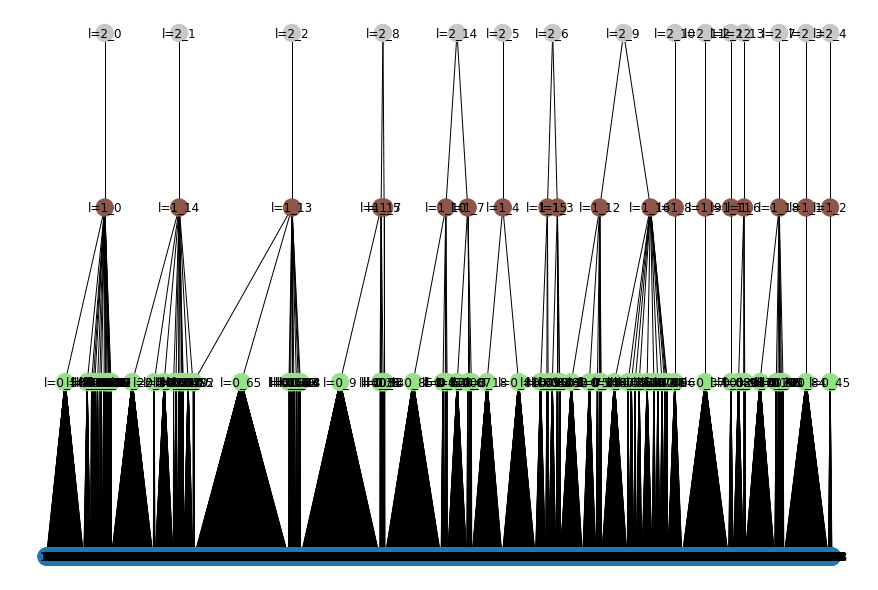

In [3]:
!python -m pip install pygraphviz
pg = nx.DiGraph()
from networkx.drawing.nx_agraph import graphviz_layout
last_part = None
for l, part in enumerate(dendrogram):
    print(l, len(part))
    for n, comm in part.items():
        nom = "l={}_{}".format(l, comm)
        pg.add_node(nom, comm=comm, color=l+1)

        if l == 0:
            pg.add_node(n, comm=comm, color=0)
            pg.add_edge(nom, n)
        else: 
            pg.add_edge(nom, "l={}_{}".format(l-1, n))
    last_part = part
   

plt.figure(figsize=(12,8))

colors = list(nx.get_node_attributes(pg, 'color').values())

nx.draw(pg, graphviz_layout(pg, prog='dot'), with_labels=True, arrows=False, node_color=colors, vmin=0, vmax=len(dendrogram) + 1, cmap=plt.cm.tab20)

## Finding k-cliques

In [25]:
ind = community.induced_graph(part, G)

In [27]:
K = nx.convert_node_labels_to_integers(ind, first_label=2)
ind.add_edges_from(K.edges())

In [36]:
list(nx.community.k_clique_communities(ind, 3))

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17})]

In [35]:
list(nx.community.k_clique_communities(ind, 4))

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15})]

In [28]:
list(nx.community.k_clique_communities(ind, 5))

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 15})]

In [32]:
list(nx.community.k_clique_communities(ind, 6))

[frozenset({2, 3, 4, 5, 6, 8})]

In [33]:
list(nx.community.k_clique_communities(ind, 7))

[]

In [34]:
list(nx.community.k_clique_communities(ind, 8))

[]